# Este notebook sirve para dejar casi lista la base de datos
Los pasos son:

1) Filtrar en frecuencia la señal del pickle del notebook 2. Ojalá entre 4 y 75 Hz que son frecuencias de interés

2) Hecho esto, realizar un nuevo downsampling hasta 256 Samples por segundo, dado que se quiere trabajar con imagenes pequeñas.


In [1]:
%matplotlib notebook
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
from scipy import signal

In [ ]:
1000/256

In [2]:
# colocar la ruta y el nombre del archivo pickle generado con el codigo 02_ReferenciarArea.ipynb

# RAT MILO - CONTROL
#fname = 'Raw_LFP_RAT02_SP_7_2017_01_11_18_46_49'
#ruta ='/home/romulo/DATA/Carolina/R02/RAT02_SP_7_2017_01_11_18_46_49/'

# RAT C14 ALEX
fname = 'ZScoredLFP_CA_EC03_C14'
ruta = '/home/cmanalisis/1_SergioEhijo/Ratas/C14_Alex/Pickles/'
lfp = pickle.load(open( ruta+fname+'.pickle', "rb" ) )

In [3]:
lfp

,Channel,Area,OriginalSampleRate,SampleRate,Use,Timestamps at original sample rate,LFP
0,CH1,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.4243731944286271, 0.37725204297633624, 0.30..."
1,CH10,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.01396084286772803, 0.05303670903624445, 0...."
2,CH11,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.2181750294183304, -0.3309717955917523, -0...."
3,CH12,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.17107225260010928, -0.10000508720846243, -..."
4,CH13,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-1.6956368124432863, -1.7909654076268176, -1...."
5,CH14,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.1805593781972531, 0.273332439490279, 0.3227..."
6,CH15,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.17381616359727983, 0.07816595091917983, -0...."
7,CH16,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.26869568952051975, 0.37844835472783167, 0.4..."
8,CH17,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.011715186622978324, -0.0007937651668658008,..."
9,CH18,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.04653908577181065, 0.06507085456569905, 0.0..."


<IPython.core.display.Javascript object>


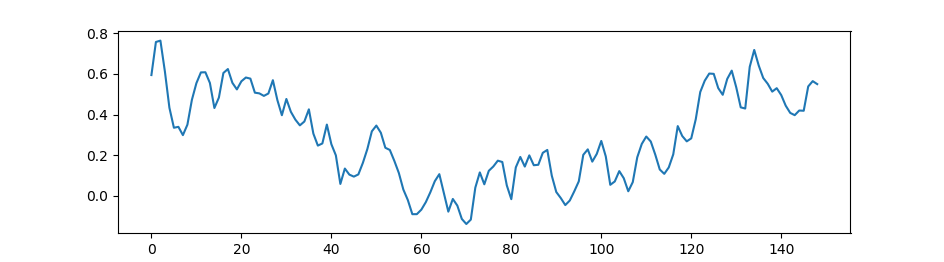

In [4]:
ad = lfp.LFP[43][:149]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)

<IPython.core.display.Javascript object>


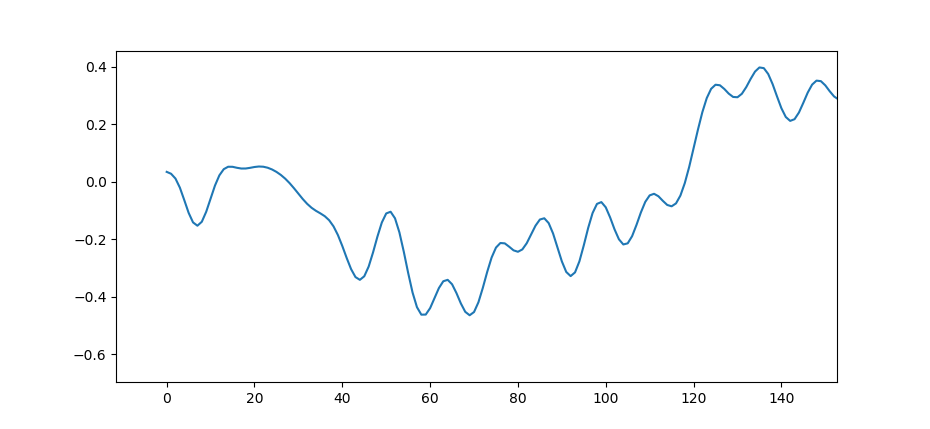

In [10]:
ad = lfp.LFP[43][:1000]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)

In [ ]:
ad = lfp.LFP[0][:149]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)

In [ ]:
ad = lfp.LFP[0][:149]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)

In [ ]:
#muestra de como queda la señal despues de filtrar
# opcional
N =5
ad = lfp.LFP[0][0:10000]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)
f1 = 3.0
f2 = 100.0
Wn = np.array([f1/Nyquist, f2/Nyquist])
b,a = scipy.signal.butter(N, Wn, btype='bandpass', analog=False) 
#Nhigh = 6
#Nlow  = 2
#Highpass parameters
#flow= 60
#Wnlow = flow/Nyquist
#blow,alow = scipy.signal.butter(Nlow, Wnlow, analog=False)
adfilt = scipy.signal.filtfilt(b, a, ad, padlen=None)
#fhigh = 2
#Wnhigh = fhigh/Nyquist
#b,a = scipy.signal.butter(Nhigh, Wnhigh, btype ='highpass',analog=False)
#adfilt2 = scipy.signal.filtfilt(b, a, adfilt, padlen=None)
ax.plot(adfilt,'r')
plt.show()
plt.legend(['Original','Filtered'])

### Leer paper de deep learning heading true north y realizar downsampling!


### Realizar filtrado pasabanda entre 3 y 100 Hz
##### No hay downsampling

In [5]:
listChannels = lfp.Channel.tolist()
Nyquist = lfp.SampleRate[0]/2
#OriginalSampleRate = lfp.SampleRate[0]
#desiredSampleRate = 256.0
N =5
f1 = 3.0
f2 = 100.0
Wn = np.array([f1/Nyquist, f2/Nyquist])
b,a = scipy.signal.butter(N, Wn, btype='bandpass', analog=False)

# Obtener downsamplefactor
#downsamplefactor = int(OriginalSampleRate/desiredSampleRate)
for i in range(len(listChannels)):
    #Se obtiene la señal de lfp
    ad = lfp.LFP[i]
    # Se aplica el filtro pasabanda
    aux = scipy.signal.filtfilt(b, a, ad, padlen=None)
    # Se aplica el filtro pasabajo
    #adfilt = scipy.signal.filtfilt(blow, alow, ad, padlen=None)
    # multiplo de downsampling factor
    #multiplo_dsf = int(len(aux)/downsamplefactor)
    # crear array de n x downsamplefactor para promediar 
    #aux2 = aux[0:downsamplefactor*multiplo_dsf].reshape(-1, downsamplefactor)
    # promedio y con esto el downsampling esta finalizado
    #aux2 = aux2.mean(axis=1)
    # Se aplica el filtro pasa alto
    #final = scipy.signal.filtfilt(b, a, aux2, padlen=None)
    lfp.LFP[i] = aux
    #lfp.OriginalSampleRate[i] = OriginalSampleRate
    #lfp.SampleRate[i] = desiredSampleRate 

/home/cmanalisis/anaconda2/envs/py3-env/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/cmanalisis/anaconda2/envs/py3-env/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
lfp

,Channel,Area,OriginalSampleRate,SampleRate,Use,Timestamps at original sample rate,LFP
0,CH1,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.018332029390342477, -0.03278736868023401, -..."
1,CH10,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.04078297544615877, 0.10535131184173088, 0.1..."
2,CH11,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.07928274331206221, -0.1251439550652389, -0..."
3,CH12,lSTR,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.08537699764353247, 0.17523043936996005, 0.2..."
4,CH13,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[-0.15585135682155143, -0.16095390849804947, -..."
5,CH14,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.039891641245123094, 0.0939481313330054, 0.1..."
6,CH15,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.03284943558604545, -0.019316886556314868, -..."
7,CH16,lCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.06712764944191532, 0.13652784635475387, 0.1..."
8,CH17,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.05683469066840138, 0.08724999959020364, 0.1..."
9,CH18,rCFA,30000,1000.0,1,"[1294592.0, 1295616.0, 1296640.0, 1297664.0, 1...","[0.006086427542466597, 0.03293791354523316, 0...."


In [ ]:
ad = lfp.LFP[0][0:10000]
Nyquist = lfp.SampleRate[0]/2
fig, ax = plt.subplots()
ax.plot(ad)

In [8]:
# save proccessed LFP file

#processing = 'downsampling to 256 Hz'
extra = 'CA_EC03_C14'
#file2save = ruta+'DownsampledLFP256Hz_'+extra+'.pickle'
file2save = ruta+'1kSLFPBandPass-3-100-Filtered_'+extra+'.pickle'
print (file2save)
answer = input('The file below will be saved. Save?(Y/n):')
if answer == 'n':
    print ('Saving canceled')
elif answer == 'Y':
    print ('Saving file to %s...' % (file2save))
    # Guarda el archivo
    pickle.dump(lfp, open(file2save, "wb" ) ) 
    #pickle.dump([lfp,processing,average_lfp], open(file2save, "wb" ) ) 
else:
    print ('Saving canceled')

/home/cmanalisis/1_SergioEhijo/Ratas/C14_Alex/Pickles/1kSLFPBandPass-3-100-Filtered_CA_EC03_C14.pickle
The file below will be saved. Save?(Y/n):Y
Saving file to /home/cmanalisis/1_SergioEhijo/Ratas/C14_Alex/Pickles/1kSLFPBandPass-3-100-Filtered_CA_EC03_C14.pickle...


### The cell below is for practice and visualization of the filter response

In [ ]:
N =5
fig = plt.figure()
ax1 = fig.add_subplot(111)
#Nhigh= 2
fs = 1000.0
Nyquist = fs/2
#f =60
#Wn = f/Nyquist
#b,a = scipy.signal.butter(N, Wn,analog=False)
f1 = 3.0
f2 = 100.0
Wn = np.array([f1/Nyquist, f2/Nyquist])
for order in [3, 5, 6]:
        b,a = scipy.signal.butter(order, Wn, btype='bandpass', analog=False)
        w, h = signal.freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
 
#w, h = signal.freqz(b, a)
#plt.semilogx(w, 20 * np.log10(abs(h)))
#ax.plot(w, h)
#ymin, ymax = ax.get_ylim()
#plt.axvline(f/Nyquist, color='green')

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

#ax2 = ax1.twinx()
#angles = np.unwrap(np.angle(h))
#plt.plot(w, angles, 'r')
#plt.ylabel('Angle (radians)', color='g')
#plt.axis('tight')
plt.show()